```
Thanks and credits:
1) https://www.kaggle.com/kenjee/titanic-project-example
2) https://www.kaggle.com/startupsci/titanic-data-science-solutions
3) https://www.kaggle.com/camole/titanic-top-9-with-extra-random-forest/comments
4) https://www.kaggle.com/abdelrahmanzied/titanic-top-14-who-lives-and-who-dies
```

In [1]:
# _import required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# _load training data to a dataframe
train_df = pd.read_csv('../input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# _load testing data to a dataframe
test_df = pd.read_csv('../input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(f'Training dataframe shape: {train_df.shape}\n')

# _observe the result of info() method - check for Dtype, Non-null count columns
train_df.info()

Training dataframe shape: (891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(f'Training dataframe shape: {test_df.shape}\n')

# _observe the result of info() method - check for Dtype, Non-null count columns
test_df.info()

Training dataframe shape: (418, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Number of missing values in each column of training data
missing_val_count_by_column = (train_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

print('---'*20)

# Number of missing values in each column of test data
missing_val_count_by_column = (test_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64
------------------------------------------------------------
Age       86
Fare       1
Cabin    327
dtype: int64


In [7]:
# _observe the result of describe() method for numerical values -- check all values
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# _observe the result of describe() method for categorical values -- check all values
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Odahl, Mr. Nils Martin",male,1601,B96 B98,S
freq,1,577,7,4,644


In [9]:
# _by looking at the data, it is obvious that the columns PassengerID, Ticket are not useful for the classification purpose
# _so we can drop those columns
drop_cols = ['PassengerId', 'Ticket']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(['Ticket'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe80d64e950>,
      dtype=object)

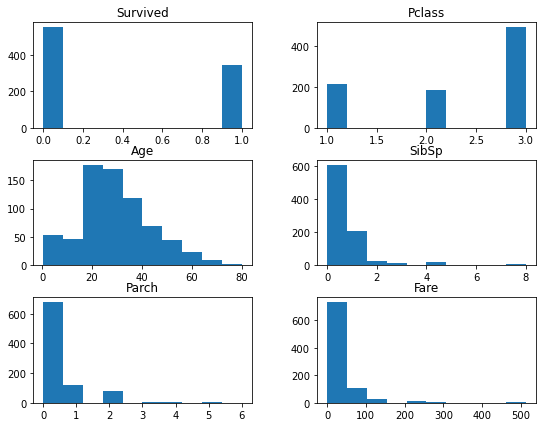

In [10]:
# _plot histograms on numerical data and observe if all the important data is having same x-axis range/scale.
# _check whether the plots are following normal distribution
train_df.hist(bins=10,figsize=(9,7),grid=False)

In [11]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']

In [12]:
# _separate the numerical and categorical columns for data exploration
df_num = train_df[num_cols]
df_cat = train_df[cat_cols]

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


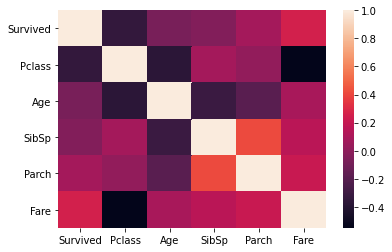

In [13]:
# _observe the correlation analysis
print(train_df.corr())
sns.heatmap(train_df.corr())

In [14]:
# _we can see Parch and SibSp are strongly correlated. so we can add new column which combines both the columns
# _we will see the effect of this combined column on Survival later 
train_df['FamMembers'] = train_df['Parch'] + train_df['SibSp'] + 1
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


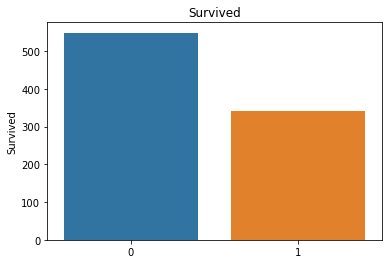

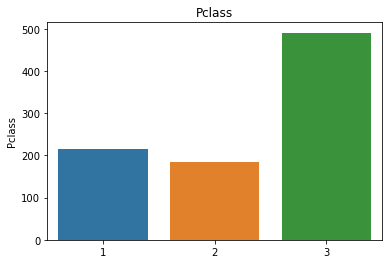

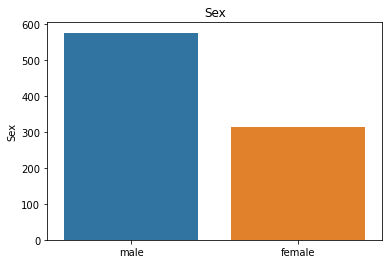

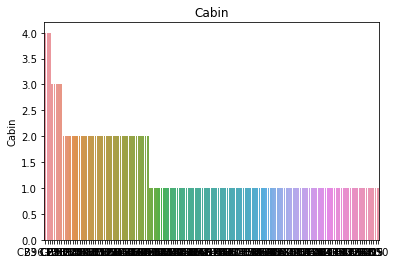

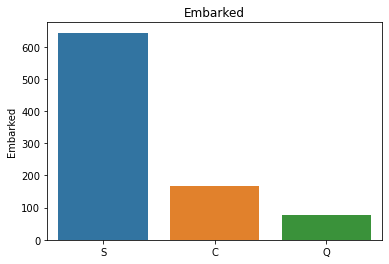

In [15]:
# _ below are the barplots used for checking the proportion of unique values in each categorical column
for col in df_cat.columns:
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts()).set_title(col)
    plt.show()

In [16]:
# _cabin has lot of unique values and also few people have multiple cabins and each cabin data is alphanumeric
# _for now I'm dropping the Cabin, Name column as well, we'll get back to it later
drop_cols = ['Name', 'Cabin']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [18]:
# _correlation analysis between survival and other features
# _we can use either pivot or groupby methods for this task

# _Survived vs (Pclass, Sex, Embarked, SibSp, Parch, FamMembers, Age, Fare)
# _we cannot perform pivoting on continuous numerical values such as Age and Fare

In [19]:
# _Survived vs Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
# _Survived vs Sex
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
# _Survived vs Embarked
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
# _Survived vs SibSp
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
# _Survived vs Parch
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [24]:
# _Survived vs FamMembers
train_df[['FamMembers', 'Survived']].groupby(['FamMembers'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamMembers,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


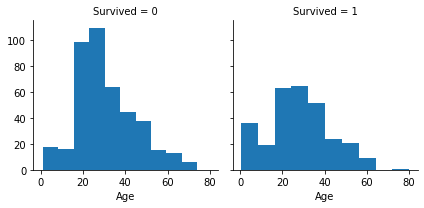

In [25]:
# _we can observe the continuous numerical values with only histogram plots
# _Survived vs Age
fgrid = sns.FacetGrid(train_df, col='Survived')
fgrid.map(plt.hist, 'Age', bins=10)

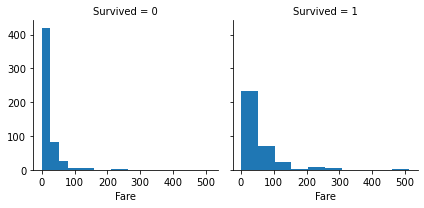

In [26]:
# _we can observe the continuous numerical values with only histogram plots
# _Survived vs Fare
fgrid = sns.FacetGrid(train_df, col='Survived')
fgrid.map(plt.hist, 'Fare', bins=10)

# Data Pre-processing

In [27]:
# _after analyzing Survived vs rest of the columns.
# _I found that the Age, Pclass and Embarked columns are giving good classification difference
# _rest of the columns are not greatly contributing for the classification purpose.
# _but still we can consider these columns while classification.

In [28]:
# _as there are only 2 null values in the Embarked column, I'm dropping that column
train_df.dropna(subset=['Embarked'], axis=0, inplace=True)
print(train_df.shape)

(889, 9)


In [29]:
# _specify the X and y in terms of train and test
y = train_df.Survived

train_df.drop(['Survived'], axis=1, inplace=True)
X = train_df.copy()

In [30]:
print(X.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamMembers'],
      dtype='object')


In [31]:
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamMembers']

# Select numerical columns
numerical_cols = ['Age', 'Fare']

In [32]:
test_df['FamMembers'] = test_df['Parch'] + test_df['SibSp'] + 1
X_test = test_df[numerical_cols + categorical_cols]

In [33]:
# _transform numerical values to log values
# _transform categorical values with one-hot encoding

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [34]:
# Preprocessing for numerical data
numerical_transformer_mean = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                             ('scale', StandardScaler()),
                                             ('power', PowerTransformer(method='yeo-johnson', standardize=True))])

# Preprocessing for categorical data
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [35]:
# Bundle preprocessing for numerical and categorical data with mean
preprocessor_mean = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_mean, numerical_cols),
        ('cat', one_hot_encoder, categorical_cols)
    ])

# Different model validation

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score

In [37]:
lr = LogisticRegression(max_iter = 2000)
dtc = DecisionTreeClassifier(random_state = 1)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state =1)

# soft_voting_clf = VotingClassifier(estimators = [('lr',lr),('dtc',dtc),('knn',knn),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'soft') 
# hard_voting_clf = VotingClassifier(estimators = [('lr',lr),('dtc',dtc),('knn',knn),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'hard') 
soft_voting_clf = VotingClassifier(estimators = [('lr',lr),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'soft') 
hard_voting_clf = VotingClassifier(estimators = [('lr',lr),('rfc',rfc),('svc',svc),('xgb',xgb)], voting = 'hard') 

In [38]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [39]:
def test_the_model(model, model_name):
    
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name} CV mean: {scores.mean()}")

In [40]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', lr)
                     ])
test_the_model(model_pipeline, "LogisticRegression")

LogisticRegression CV mean: 0.8076683806259124


In [41]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', dtc)
                     ])
test_the_model(model_pipeline, "DecisionTreeClassifier")

DecisionTreeClassifier CV mean: 0.7772868659937788


In [42]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', knn)
                     ])
test_the_model(model_pipeline, "KNeighborsClassifier")

KNeighborsClassifier CV mean: 0.8076556846314988


In [43]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', rfc)
                     ])
test_the_model(model_pipeline, "RandomForestClassifier")

RandomForestClassifier CV mean: 0.794172538564083


In [44]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', svc)
                     ])
test_the_model(model_pipeline, "SVC")

SVC CV mean: 0.8200596711737447


In [45]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', xgb)
                     ])
test_the_model(model_pipeline, "XGBClassifier")

XGBClassifier CV mean: 0.8076810766203263


In [46]:
# _from the above basic model analysis, I found out the SVClassifier, XGBClassifier and LogisticRegressionClassifier are performing,
# _well on train data, but the model are not tuned. Out of above three, SVClassifier performed the best on test data
# _In the next step, I'll use ensemble technique using VotingClassifier

In [47]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', soft_voting_clf)
                     ])
test_the_model(model_pipeline, "soft_voting_clf")

soft_voting_clf CV mean: 0.82790579572145


In [48]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', hard_voting_clf)
                     ])
test_the_model(model_pipeline, "hard_voting_clf")

hard_voting_clf CV mean: 0.8301529867326858


In [49]:
# _after evaluating basic models on test data, SVC performed the best out of all the classifiers along with voting classifiers
# _Let's tune the models and test the results

In [50]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope

In [51]:
def printbest_model(param_space):
    
    hypopt_trials = Trials()
    best_params = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=15, trials= hypopt_trials)
    
    print(best_params)
    print(hypopt_trials.best_trial['result']['loss'])
    
    return hypopt_trials.results[np.argmin([r['loss'] for r in hypopt_trials.results])]['model']

In [52]:
def objective(params):
    
    model = XGBClassifier(**params, n_jobs=-1)
    clf = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', model)
                     ])
    
    acc = cross_val_score(clf, X, y, cv=5).mean()
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [53]:
param_space_lr = {
            'max_iter': hp.choice('max_iter', [100, 1000, 2000, 2500]),
            'C': hp.choice('C', np.logspace(-4, 4, 20)),
            'penalty': hp.choice('penalty', ['l1', 'l2']),
            'solver': hp.choice('solver', ['liblinear'])
        }
#best_model_lr = printbest_model(param_space_lr)
# _LogisticRegression

In [54]:
param_space_knn = {
            'n_neighbors': hp.choice('n_neighbors', [3, 5, 7, 9]),
            'weights': hp.choice('weights', ['uniform', 'distance']),
            'p': hp.choice('p', [1, 2]),
            'algorithm': hp.choice('algorithm', ['auto'])
        }
#best_model_knn = printbest_model(param_space_knn)
# _KNeighborsClassifier

In [55]:
param_space_svc = {
            'kernel': hp.choice('kernel', ['rbf']),
            'C': hp.choice('C', [0.05, .1, 1, 10]),
            'gamma': hp.choice('gamma', [0.05, .1,.5,1,2,])
}
#best_model_svc = printbest_model(param_space_svc)
# _SVC

In [56]:
param_space_dtc = {
            'criterion': hp.choice('criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('max_depth', [15, 20, 25]),
            'min_samples_split': hp.choice('min_samples_split', [2, 3]),
            'min_samples_leaf': hp.choice('min_samples_leaf', [2, 3]),
            'max_features': hp.choice('max_features', ['auto','sqrt', 10, 'log2'])
}
#best_model_dtc = printbest_model(param_space_dtc)
# _SVC

In [57]:
param_space_dtc = {
            'criterion': hp.choice('criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('max_depth', [15, 20, 25]),
            'min_samples_split': hp.choice('min_samples_split', [2, 3]),
            'min_samples_leaf': hp.choice('min_samples_leaf', [2, 3]),
            'max_features': hp.choice('max_features', ['auto','sqrt', 10, 'log2']),
}
# best_model_dtc = printbest_model(param_space_dtc)
# _DTC

In [58]:
param_space_rfc = {
            'criterion': hp.choice('criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('max_depth', [10, 15, 20, 25]),
            'min_samples_split': hp.choice('min_samples_split', [2, 3, 4, 5]),
            'min_samples_leaf': hp.choice('min_samples_leaf', [2, 3, 4, 5]),
            'max_features': hp.choice('max_features', ['auto','sqrt', 10, 'log2']),
            'bootstrap': hp.choice('bootstrap', ['True']),
            'n_estimators': hp.choice('n_estimators', [400,450,500,550, 600])
}
#best_model_rfc = printbest_model(param_space_rfc)
# _RFC

In [59]:
param_space_xgb = {
            'gamma': hp.choice('gamma', [0,.01,.1,0.5,1,10,100]),
            'max_depth': hp.choice('max_depth', [2, 4, 5, 8, 10, 12, None]),
            'min_child_weight': hp.choice('min_child_weight', [0,.01,0.1,1,10,100]),
            'subsample': hp.choice('subsample', [0.5,0.6,0.7, 0.8, 0.9]),
            'colsample_bytree': hp.choice('max_features', [0.2, 0.5, 0.7, 0.8, 1]),
            'learning_rate': hp.choice('learning_rate', [.01,0.1,0.2,0.3,0.5, 0.7, 0.9]),
            'n_estimators': hp.choice('n_estimators', [20, 50, 100, 250, 500,1000]),
            'reg_alpha': hp.choice('reg_alpha', [0, 0.5, 1]),
            'reg_lambda': hp.choice('reg_lambda', [1, 1.5, 2])
}
best_model_xgb = printbest_model(param_space_xgb)
# _XGB

100%|██████████| 15/15 [00:24<00:00,  1.60s/trial, best loss: -0.8324065257411286]
{'gamma': 4, 'learning_rate': 2, 'max_depth': 5, 'max_features': 3, 'min_child_weight': 2, 'n_estimators': 1, 'reg_alpha': 2, 'reg_lambda': 0, 'subsample': 3}
-0.8324065257411286


In [60]:
# final_model = Pipeline(steps=[('preprocessor', preprocessor_mean),
#                       ('model', best_model_rfc)
#                      ])

# final_model.fit(X, y)
# print(final_model.steps)
# feat_importances = pd.Series(final_model.steps[1][1].feature_importances_)
# feat_importances.nlargest(20).plot(kind='barh')

In [61]:
param_space = {
            'n_estimators': scope.int(hp.quniform('n_estimators', 100, 800, 1)),
            'max_depth': hp.quniform('max_depth', 1, 50, 1),
            'criterion': hp.choice('criterion', ['gini', 'entropy']),
            'bootstrap': hp.choice('bootstrap', [True, False]),
            'max_features': hp.choice('max_features', ['auto', 'sqrt']),
            'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 2, 5, 1)),
            'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 5, 1))
        }

In [62]:
final_model = Pipeline(steps=[('preprocessor', preprocessor_mean),
                      ('model', best_model_xgb)
                     ])

final_model.fit(X, y)

preds_test = final_model.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'PassengerId': test_df.PassengerId,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)

print('Predictions are successfully saved in the file -- submission.csv')

/opt/conda/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Predictions are successfully saved in the file -- submission.csv
